In [1]:
import torchvision
from torchvision import transforms
import torch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


In [2]:
import sys
import os

sys.path.append(os.getcwd() + "/..")
#sys.path.append("..")

In [3]:
from dataset_prep_utils_semisup import dirty_semi_supervised_image

In [4]:
# torchvision.datasets.FashionMNIST

In [5]:
ls ../../../data/FashionMNIST/FashionMNIST/

processed/  raw/


In [6]:
ls ../../../data/FashionMNIST/FashionMNIST/processed

test.pt  training.pt


In [7]:
ls ../../../data/FashionMNIST/FashionMNIST/raw

t10k-images-idx3-ubyte     train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte     train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [8]:
train_set = torchvision.datasets.FashionMNIST("../../../data/FashionMNIST/", 
                                              download=True, 
                                              transform=transforms.Compose([transforms.ToTensor()]))
                                                

In [9]:
test_set = torchvision.datasets.FashionMNIST("../../../data/FashionMNIST/", 
                                             download=True, 
                                             train=False, 
                                             transform=transforms.Compose([transforms.ToTensor()]))

In [10]:
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../../../data/FashionMNIST/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [11]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../../../data/FashionMNIST/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

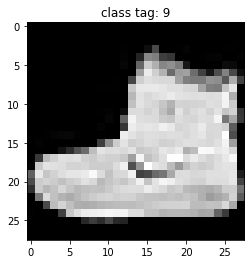

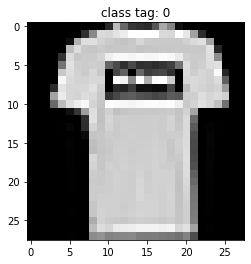

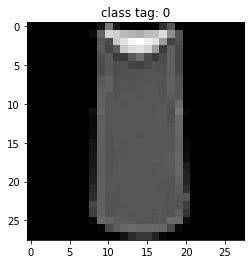

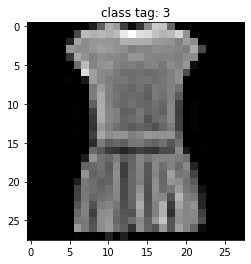

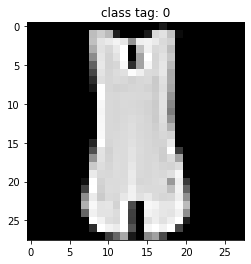

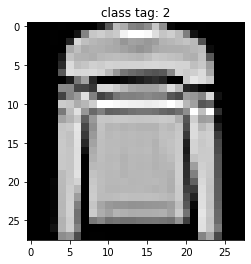

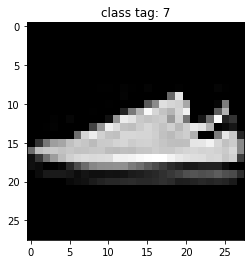

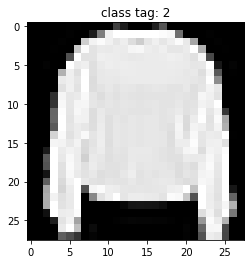

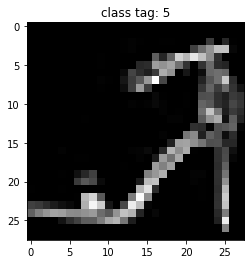

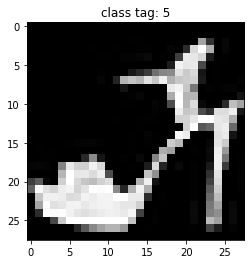

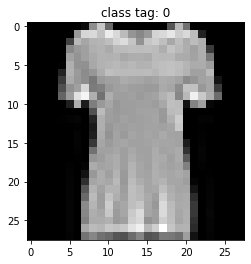

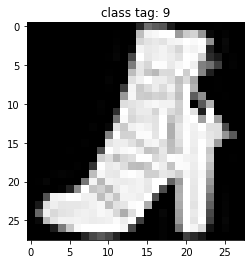

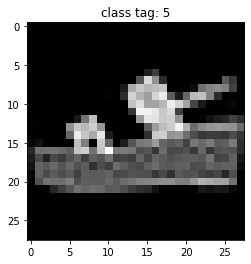

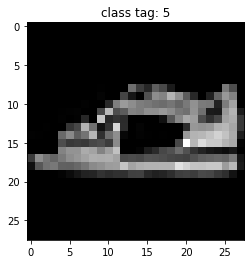

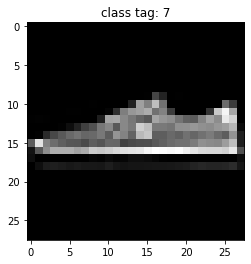

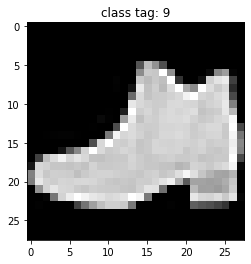

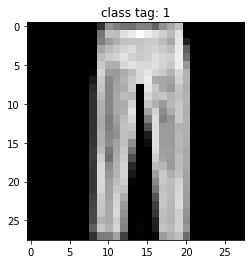

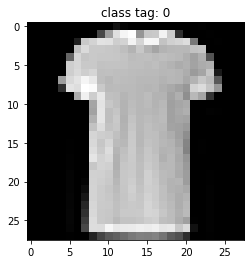

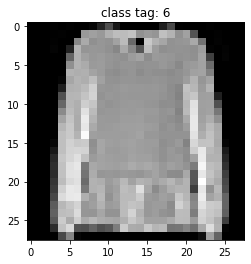

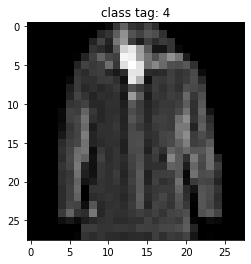

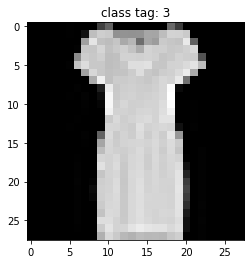

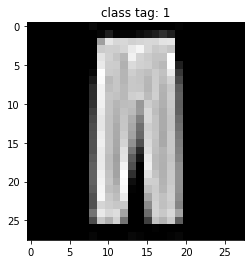

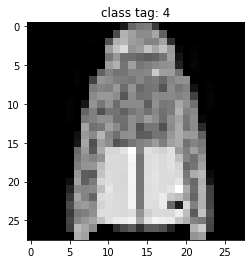

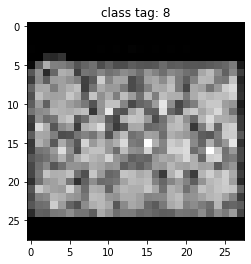

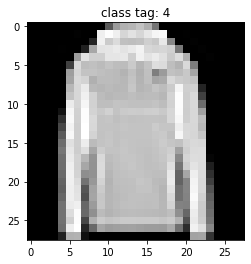

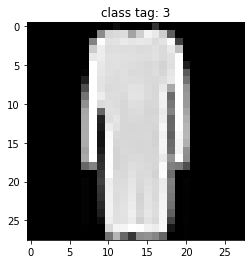

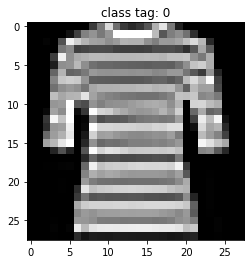

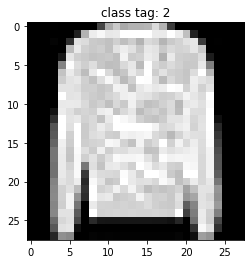

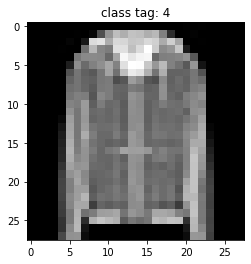

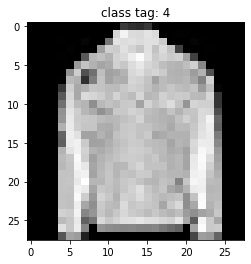

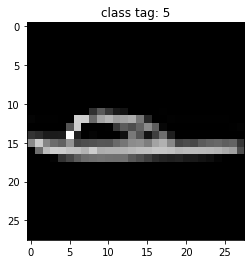

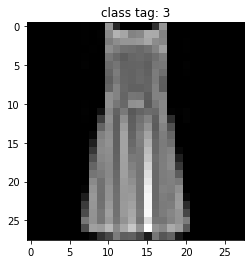

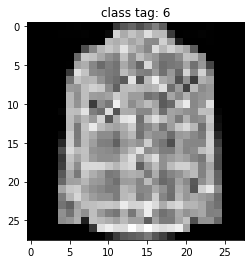

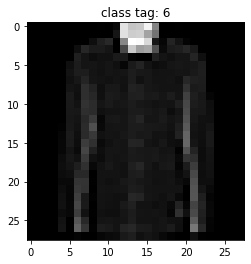

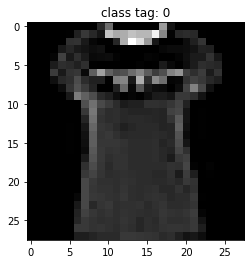

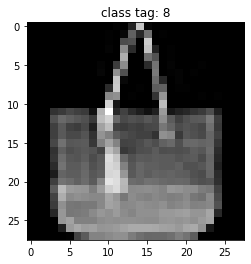

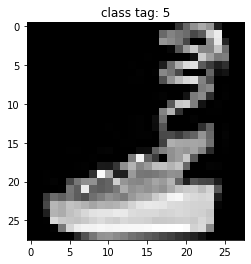

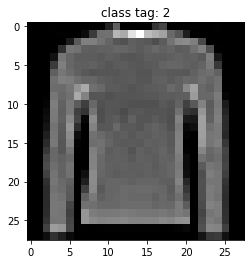

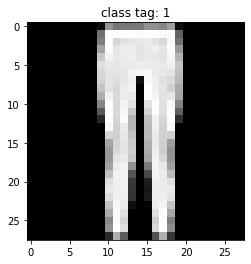

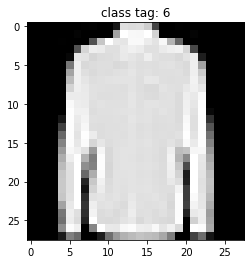

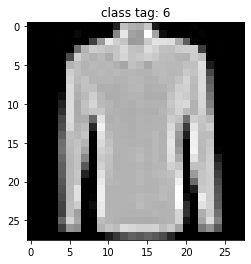

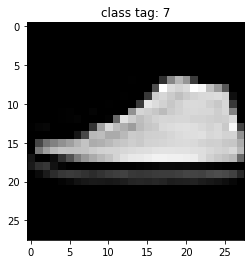

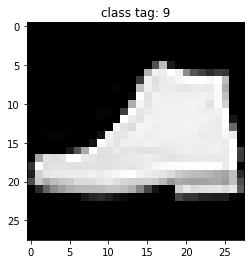

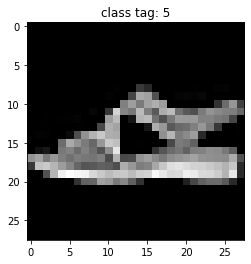

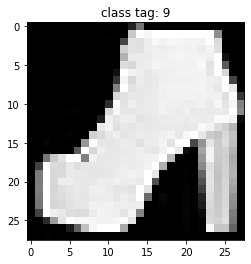

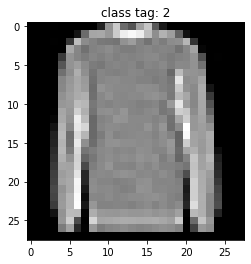

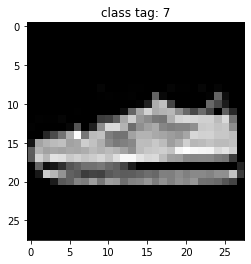

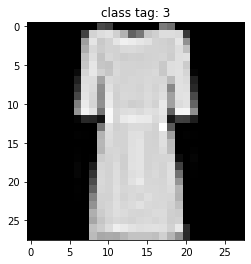

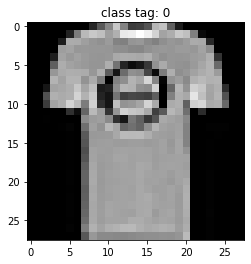

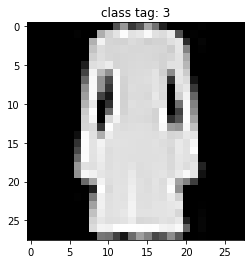

In [12]:
_iter_train = iter(train_set)

for jj in range(0,50):
    _img_point = next(_iter_train)
    
    plt.imshow(np.asarray(_img_point[0].reshape(28,28)), cmap="gray")
    plt.title(f"class tag: {_img_point[1]}")
    plt.show()

In [15]:
# get full dataset train / test

train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set))
train_imgs, train_labels = next(iter(train_loader))


test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set))
test_imgs, test_labels = next(iter(test_loader))


In [16]:
train_imgs.shape

torch.Size([60000, 1, 28, 28])

In [17]:
train_imgs.min()

tensor(0.)

In [18]:
train_imgs.max()

tensor(1.)

In [19]:
train_labels.numpy()

array([9, 0, 0, ..., 3, 0, 5])

In [20]:
test_imgs.shape

torch.Size([10000, 1, 28, 28])

In [21]:
test_imgs.min()

tensor(0.)

In [22]:
test_imgs.max()

tensor(1.)

In [23]:
test_labels.shape

torch.Size([10000])

In [24]:
train_array = train_imgs.view(-1,28,28).numpy()
train_labels = train_labels.numpy()

In [84]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
test_array = test_imgs.view(-1,28,28).numpy()
test_labels = test_labels.numpy()

In [26]:
train_labels[:5]

array([9, 0, 0, 3, 0])

In [27]:
# Save to folder, as any format (will be loaded later for noising scripts) -- to be reused.

In [32]:
path_file_save = "../../../data/FashionMNIST/"
path_raw_data = path_file_save + "original_raw/" # needs mkdir

# np.save(path_raw_data + "train_images.npy", train_array)
# np.save(path_raw_data + "train_labels.npy", train_labels)

# np.save(path_raw_data + "test_images.npy", test_array)
# np.save(path_raw_data + "test_labels.npy", test_labels)

In [29]:
# NOTE: what to do with test set? --> already given, alter code in dataset_prep to use those 10.000 points of test set instead? (technically yes.)

## Noising Example for Fashion MNIST

In [30]:

# dirty_semi_supervised_image(
#     array_data,
#     run_stats,
#     path_to_folder,
#     image_dim_in=[28, 28],
#     y_class_in=None,
#     array_data_test=None,
#     y_class_in_test=None,
# )


In [67]:
bogus_folder = path_file_save + "testing/" # save_folder
image_size = [28, 28]

run_noise_option = "simple_systematic" # salt_n_pepper ; simple_systematic

if run_noise_option == "simple_systematic":
    
    run_stats = {
        "name": "bogus_run",
        "train_size": 0.9,
        "valid_size": 0.1,
        "test_size": None,
        "trusted_set": {
            "use_labels": "joint_classes",  # "joint_classes"; no_labels; joint_classes; dirty_classes_only
            "min_coverage": True,  # True
            "mc_mode": "fixed_number",  # "fixed_number" "stratisfied_v2", fixed ?
            "samples_fixed": 10,
            "frac_trusted": 0.05,  # ignored if samples fixed.
            "y_class_on": True,
            "y_noise_lists_on": True,
        },
        "type_noise": "SystematicSimpleShapes",
        "defs": {
            "p_img": 0.25, # corruption probability
            "min_val": 0,
            "max_val": 1, # check this, and if freyfaces needs standardizing beforehand.
            "p_min": 0.5,
            "pixel_val_fixed": 0.6, # otherwise fix a value value; None or value (e.g. 150)
            "number_blocks": 4, # 1 ; 2; 4
            "rand_blocks": False,
            "side_len": 4, # 4 ; 11
            "std_shift": (10,10), # (10,10) ; (5, 6)
            "use_other_patterns": True,
            "random_state": None,  # seed number
            "combs_on": True,  # True / False
        },
        "noise_list_trusted": "regular",  # "regular" # type of labelling for trusted set, dataset dependent
    }


    # NOTE:

    # img_prob_noise=run_stats["defs"]["p_img"],
    # min_val=run_stats["defs"]["min_val"],
    # max_val=run_stats["defs"]["max_val"],
    # prob_min=run_stats["defs"]["p_min"],
    # pixel_val_fixed=run_stats["defs"]["pixel_val_fixed"],
    # number_blocks=run_stats["defs"]["number_blocks"],
    # rand_blocks=run_stats["defs"]["rand_blocks"],
    # side_len=run_stats["defs"]["side_len"],
    # std_shift=run_stats["defs"]["std_shift"],
    # use_other_patterns=run_stats["defs"]["use_other_patterns"],
    # random_state=run_stats["defs"]["random_state"],
    # combs_on=run_stats["defs"]["combs_on"],

    # ["noise_list_trusted"] ; 

    # ["trusted_set"]["y_class_on"] ; ["trusted_set"]["y_noise_lists_on"] ; ["trusted_set"]["use_labels"] ;

    # ["trusted_set"]["use_labels"] := "clean_class_only" / "dirty_classes_only" / "joint_classes"

elif run_noise_option == "salt_n_pepper":
    
    run_stats = {
        "name": "bogus_run",
        "train_size": 0.9,
        "valid_size": 0.1,
        "test_size": None,
        "trusted_set": {
            "use_labels": "joint_classes",  # "joint_classes"; no_labels; joint_classes; dirty_classes_only
            "min_coverage": True,  # True
            "mc_mode": "fixed_number",  # "fixed_number" "stratisfied_v2", fixed ?
            "samples_fixed": 10,
            "frac_trusted": 0.05,  # ignored if samples fixed.
            "y_class_on": True,
            "y_noise_lists_on": True,
        },
        "type_noise": "SaltnPepper",
        "defs": {
            "p_img": 0.25, # image corruption probability
            "min_val": 0,
            "max_val": 1, # check this, and if freyfaces needs standardizing beforehand.
            "p_min": 0.5,
            "p_pixel": 0.2, # pixel corruption probability
            "conv_to_int": False,
        },
    }
    
    # NOTE:
    
    # probability=run_stats["defs"]["p_img"],
    # one_cell_flag=False,
    # min_val=run_stats["defs"]["min_val"],
    # max_val=run_stats["defs"]["max_val"],
    # p_min=run_stats["defs"]["p_min"],
    # p_pixel=run_stats["defs"]["p_pixel"],
    # conv_to_int=run_stats["defs"]["conv_to_int"],


In [68]:
dirty_semi_supervised_image(train_array, run_stats, bogus_folder, 
                            image_size, y_class_in=train_labels, 
                            array_data_test=test_array, y_class_in_test=test_labels)


In [69]:
bogus_folder

'../../../data/FashionMNIST/testing/'

In [70]:
noised_data_train_df = pd.read_csv(bogus_folder + "bogus_run/train/data_noised.csv")
clean_data_train_df =  pd.read_csv(bogus_folder + "bogus_run/train/data_clean.csv")

trusted_idxs = pd.read_csv(bogus_folder + "bogus_run/train/trusted_idxs.csv").values.flatten()

tuples_train_changed = pd.read_csv(bogus_folder + "bogus_run/train/tuples_changed_mtx.csv").values.flatten()
tuples_train_changed =  tuples_train_changed.astype(bool)
cells_train_changed = pd.read_csv(bogus_folder + "bogus_run/train/cells_changed_mtx.csv").values.reshape(-1,28,28)
cells_train_changed = cells_train_changed.astype(bool)

with open(bogus_folder + "bogus_run/train/y_noise_dict.json", "r") as read_file:
    y_noise_dict = json.load(read_file)

In [71]:
noised_data_test_df = pd.read_csv(bogus_folder + "bogus_run/test/data_noised.csv")
clean_data_test_df =  pd.read_csv(bogus_folder + "bogus_run/test/data_clean.csv")

tuples_test_changed = pd.read_csv(bogus_folder + "bogus_run/test/tuples_changed_mtx.csv").values.flatten()
tuples_test_changed = tuples_test_changed.astype(bool)
cells_test_changed = pd.read_csv(bogus_folder + "bogus_run/test/cells_changed_mtx.csv").values.reshape(-1,28,28)
cells_test_changed = cells_test_changed.astype(bool)

with open(bogus_folder + "bogus_run/test/y_noise_dict.json", "r") as read_file:
    y_noise_dict = json.load(read_file)

In [72]:
y_noise_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7'])

In [73]:
trusted_idxs

array([39839, 39545, 13414, 14383, 53373, 39134,  2191,   125, 47451,
       37649, 45684, 53319,  8359, 48917, 31504, 17331, 35301, 46044,
       15507,  7793, 34402, 48212, 22988, 29083, 26456, 11542,  4907,
        7767,  8013, 31016, 16628, 21725, 34194, 52125, 31101, 36474,
       29672, 26851, 48435, 46644, 36297, 33999, 24516,  4179, 35496,
        5268, 52533, 17297, 33442, 25431, 32063, 52893, 16821, 21194,
       47792, 17811,   320, 15928, 52731, 46557, 51560, 39846, 19720,
       19741, 34517, 44700, 45145, 48106,  4202, 11573,  1545, 49079,
       33885, 52852, 49148, 50743, 44593, 34605, 15209, 43933, 10836,
       48619, 45735, 26529,  3990,  4858,  2317, 20174, 23976, 45847,
       14273, 43335, 30763, 31347,  3529,  3706, 28405, 33434,  1792,
       47118, 50311, 24230, 22325, 47033, 23011, 19506, 37139, 24170,
        1945, 40451,  4313, 22335, 19594, 31197, 10608, 23383, 20756,
        4061, 41790, 26232, 42128,  1589, 34911, 12376,  6579,  2388,
       39627, 42046,

In [74]:
tuples_train_changed

array([False, False,  True, ...,  True, False, False])

In [75]:
noised_data_train_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062745,...,0.047059,0.007843,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,...,0.639216,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.278431,0.015686,0.000000,0.000000,0.007843,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.454902,0.603922,0.349020,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
53996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090196,...,0.725490,0.109804,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
53997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.403922,0.549020,0.105882,0.196078,0.603922,0.105882,0.0,0.0,0.0,0.0
53998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [76]:
noised_train_data = noised_data_train_df.values.reshape(-1, 28,28)
clean_train_data = clean_data_train_df.values.reshape(-1, 28,28)

In [77]:
noised_test_data = noised_data_test_df.values.reshape(-1, 28,28)
clean_test_data = clean_data_test_df.values.reshape(-1, 28,28)

In [78]:
img_x = 28
img_y = 28

def show_examples(data, n=None, n_cols=20, thumbnail_cb=None, is_gray=False, scale_gray=(0,1)):
    if n is None:
        n = len(data)    
    n_rows = int(np.ceil(n / float(n_cols)))
    figure = np.zeros((img_x * n_rows, img_y * n_cols))
    for k, x in enumerate(data[:n]):
        r = k // n_cols
        c = k % n_cols
        figure[r * img_x: (r + 1) * img_x,
               c * img_y: (c + 1) * img_y] = x
        if thumbnail_cb is not None:
            thumbnail_cb(locals())
        
    plt.figure(figsize=(12, 10))
    if is_gray:
        plt.imshow(figure, cmap="gray", vmin=scale_gray[0], vmax=scale_gray[1])
    else:
        plt.imshow(figure)
    plt.axis("off")
    plt.tight_layout()



In [79]:
noised_train_data.shape

(54000, 28, 28)

In [80]:
noised_test_data.shape

(10000, 28, 28)

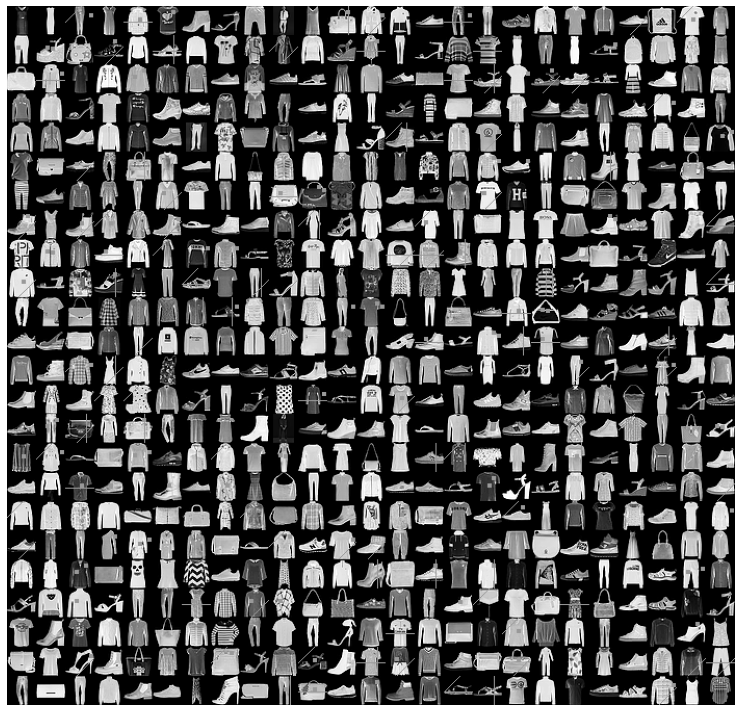

In [81]:
show_examples(noised_train_data, n=600, n_cols=25, is_gray=True) 

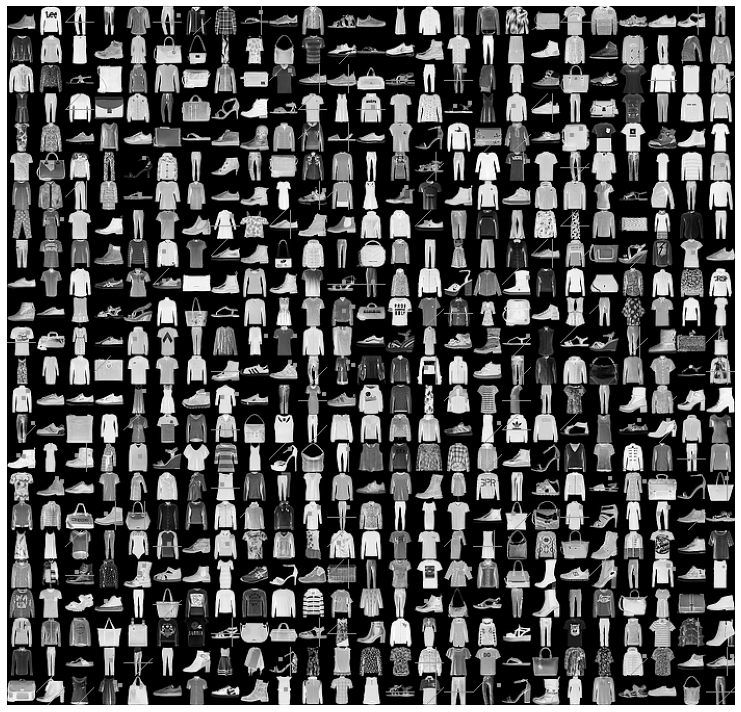

In [82]:
show_examples(noised_test_data, n=600, n_cols=25, is_gray=True) 

y_noise: 1


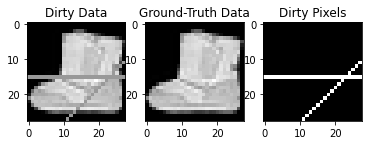

y_noise: 1


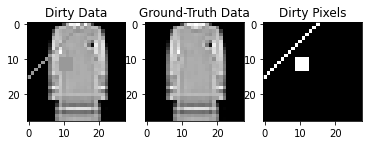

y_noise: 1


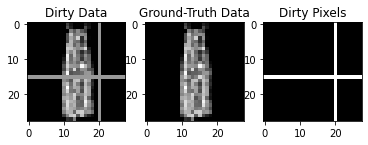

y_noise: 1


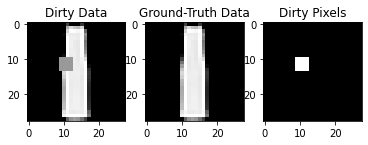

y_noise: 1


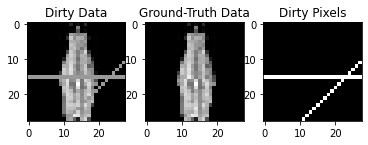

y_noise: 1


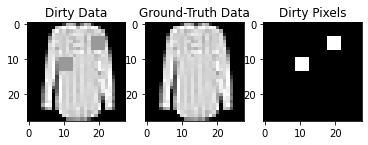

y_noise: 1


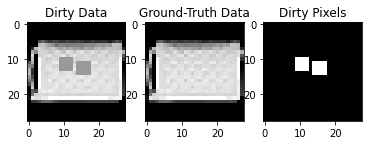

y_noise: 1


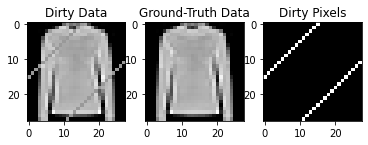

y_noise: 1


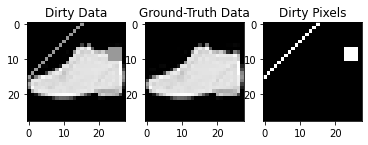

y_noise: 1


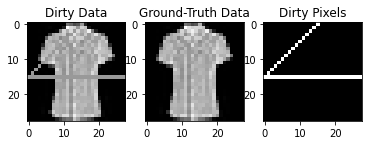

y_noise: 1


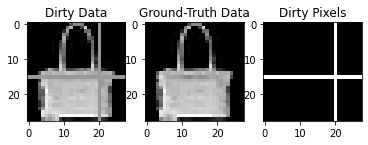

y_noise: 1


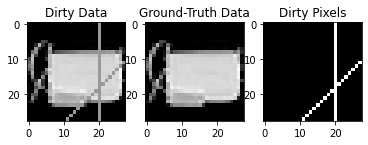

y_noise: 1


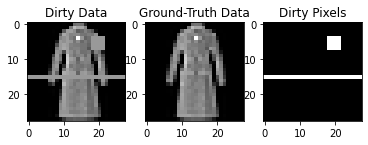

y_noise: 1


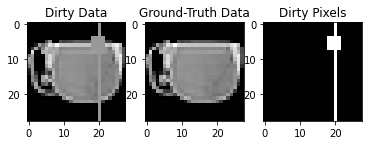

y_noise: 1


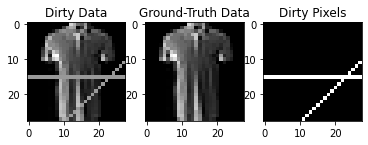

y_noise: 1


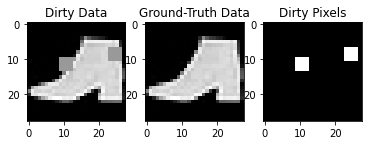

y_noise: 1


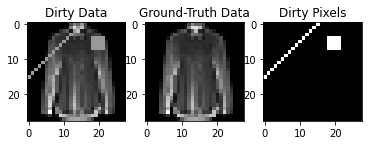

y_noise: 1


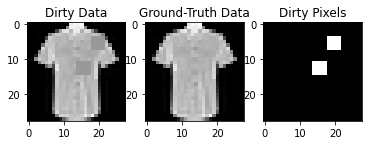

y_noise: 1


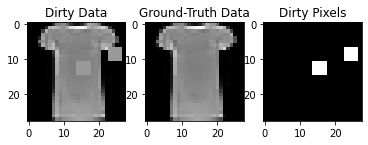

y_noise: 1


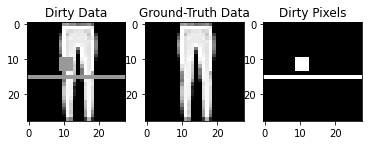

y_noise: 1


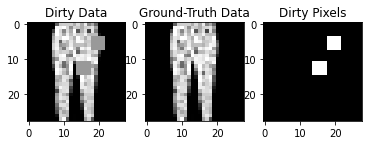

y_noise: 1


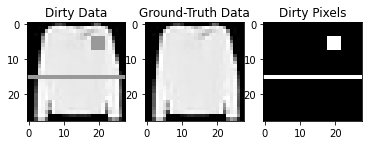

y_noise: 1


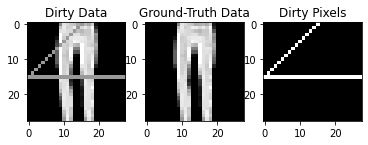

y_noise: 1


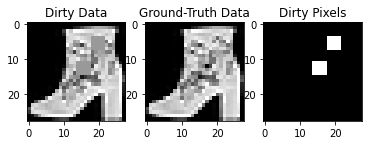

y_noise: 1


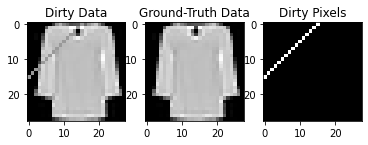

In [83]:
# Show Random Dirty Images

max_imgs_show = 25
y_noise_idxs_train = np.where(tuples_train_changed)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(tuples_train_changed[idx])))
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(noised_train_data[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(clean_train_data[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(cells_train_changed[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    plt.show()
